In [1]:
import os
os.chdir('C:\\Users\\SHAILESH TIWARI\\Downloads\\sales prediction regression dataset')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('train_data.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
data.shape

(8523, 12)

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
s1=data.dtypes
s1.groupby(s1).count()

int64      1
float64    4
object     7
dtype: int64

In [12]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
data.isnull().sum().sort_values(ascending = False).head(20)

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64

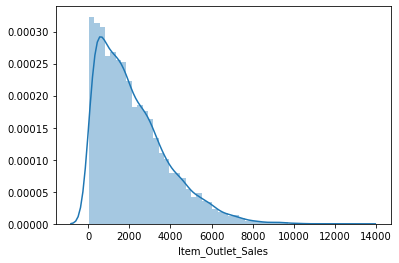

In [14]:
sns.distplot(data['Item_Outlet_Sales'])

In [15]:
# Log is used to respond to skewness towards large values 
data["Item_Outlet_Sales"] = np.log1p(data["Item_Outlet_Sales"])
y = data['Item_Outlet_Sales'].reset_index(drop=True)

In [16]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

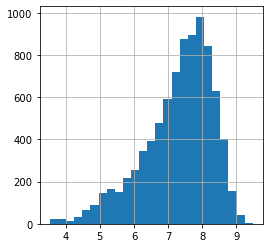

In [17]:
data["Item_Outlet_Sales"].hist(bins=25, figsize=(4,4))

In [18]:
corr_matrix = data.corr(method='pearson')
corr_matrix['Item_Outlet_Sales'].sort_values(kind="quicksort")

Item_Visibility             -0.192996
Item_Weight                  0.009776
Outlet_Establishment_Year    0.077032
Item_MRP                     0.509886
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

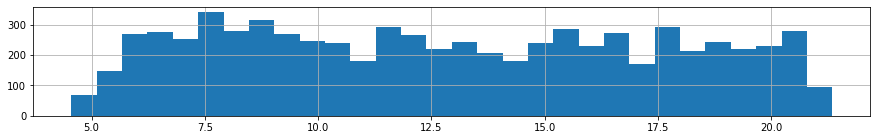

In [19]:
data["Item_Weight"].hist(bins=30, figsize=(15,2))

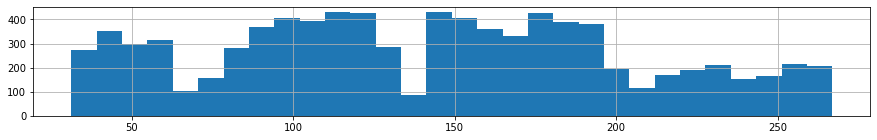

In [20]:
data["Item_MRP"].hist(bins=30, figsize=(15,2))

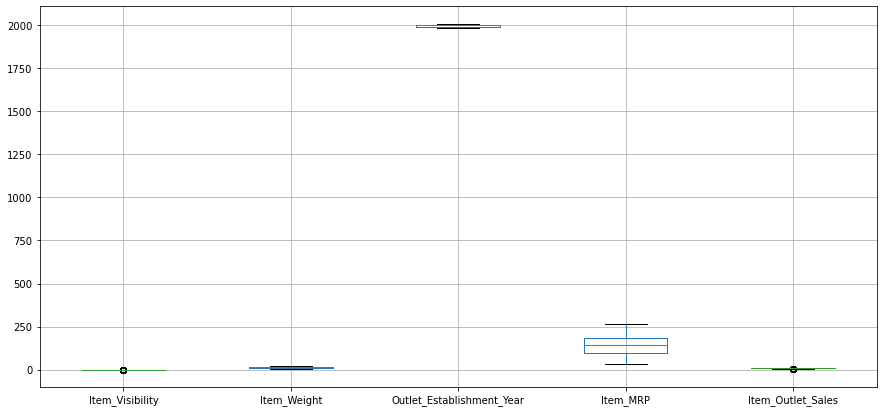

In [21]:
data.boxplot(figsize=(15,7), column=['Item_Visibility','Item_Weight','Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales'])

In [22]:
#dropping the column
data.drop(['Item_Identifier'], axis = 1, inplace = True)

In [23]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.597664
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,7.929984
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,6.310436
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,7.085159
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.521100


In [24]:
data['Outlet_Size'].count

<bound method Series.count of 0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object>

In [25]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Outlet_Size,2410,28.3
Item_Weight,1463,17.2
Item_Outlet_Sales,0,0.0
Outlet_Type,0,0.0
Outlet_Location_Type,0,0.0


In [26]:
#dropping the column
data.drop(['Outlet_Size'], axis = 1, inplace = True)
data.drop(['Outlet_Identifier'], axis = 1, inplace = True)

In [27]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,8.225808
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,6.096776
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,7.648868
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,6.597664
4,8.93,Low Fat,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,6.903451


In [28]:
data.columns.values

array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'], dtype=object)

In [29]:
#check for missing value, unique etc
FileNameDesc = pd.DataFrame(columns = ['column_name','missing_count','percent_missing','unique_count'])
for col in list(data.columns.values):
    sum_missing = data[col].isnull().sum()
    percent_missing = sum_missing/len(data)*100
    uniq_count = (data.groupby([col])[col].count()).count()
    FileNameDesc = FileNameDesc.append({'column_name':col,'missing_count':sum_missing,
                                        'percent_missing':percent_missing,'unique_count':uniq_count},
                                       ignore_index = True)

In [30]:
FileNameDesc

,column_name,missing_count,percent_missing,unique_count
0,Item_Weight,1463,17.165317,415
1,Item_Fat_Content,0,0.000000,5
2,Item_Visibility,0,0.000000,7880
3,Item_Type,0,0.000000,16
4,Item_MRP,0,0.000000,5938
5,Outlet_Establishment_Year,0,0.000000,9
6,Outlet_Location_Type,0,0.000000,3
7,Outlet_Type,0,0.000000,4
8,Item_Outlet_Sales,0,0.000000,3493


In [31]:
#Apply Mode strategy to populate the categorical data
data.groupby('Item_Fat_Content').agg({'Item_Fat_Content': np.size})

,Item_Fat_Content
Item_Fat_Content,
LF,316
Low Fat,5089
Regular,2889
low fat,112
reg,117


In [32]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].fillna('Low Fat')
data["Item_Fat_Content"] = data["Item_Fat_Content"].astype('category')
data["Item_Fat_Content"] = data["Item_Fat_Content"].cat.codes

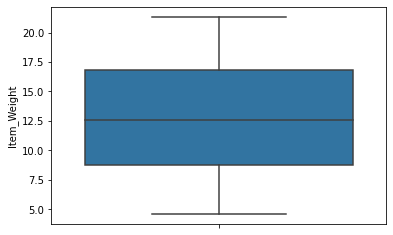

In [33]:
sns.boxplot(y="Item_Weight",data=data) 

In [34]:
data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)

In [35]:
#Mean strategy to populate the quantitative variable
data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)

In [36]:
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [37]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,Dairy,249.8092,1999,Tier 1,Supermarket Type1,8.225808
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,Tier 3,Supermarket Type2,6.096776
2,17.50,1,0.016760,Meat,141.6180,1999,Tier 1,Supermarket Type1,7.648868
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,1998,Tier 3,Grocery Store,6.597664
4,8.93,1,0.000000,Household,53.8614,1987,Tier 3,Supermarket Type1,6.903451


In [38]:
#Apply Mode strategy to populate the categorical data
data.groupby('Item_Type').agg({'Item_Type': np.size})

,Item_Type
Item_Type,
Baking Goods,648
Breads,251
Breakfast,110
Canned,649
Dairy,682
Frozen Foods,856
Fruits and Vegetables,1232
Hard Drinks,214
Health and Hygiene,520


In [39]:
data["Item_Type"]=data["Item_Type"].fillna('Fruits and Vegetables')
data["Item_Type"] = data["Item_Type"].astype('category')
data["Item_Type"] = data["Item_Type"].cat.codes

In [40]:
data.groupby("Outlet_Type").agg({'Outlet_Type': np.size})

,Outlet_Type
Outlet_Type,
Grocery Store,1083
Supermarket Type1,5577
Supermarket Type2,928
Supermarket Type3,935


In [41]:
data["Outlet_Type"]=data["Outlet_Type"].fillna('Supermarket Type1')
data["Outlet_Type"] = data["Outlet_Type"].astype('category')
data["Outlet_Type"] = data["Outlet_Type"].cat.codes

In [42]:
data.groupby('Outlet_Location_Type').agg({'Outlet_Location_Type': np.size})

,Outlet_Location_Type
Outlet_Location_Type,
Tier 1,2388
Tier 2,2785
Tier 3,3350


In [43]:
data["Outlet_Location_Type"]=data["Outlet_Location_Type"].fillna('Tier 3')
data["Outlet_Location_Type"] = data["Outlet_Location_Type"].astype('category')
data["Outlet_Location_Type"] = data["Outlet_Location_Type"].cat.codes

In [44]:
data.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,1,0.016047,4,249.8092,1999,0,1,8.225808
1,5.920000,2,0.019278,14,48.2692,2009,2,2,6.096776
2,17.500000,1,0.016760,10,141.6180,1999,0,1,7.648868
3,19.200000,2,0.000000,6,182.0950,1998,2,0,6.597664
4,8.930000,1,0.000000,9,53.8614,1987,2,1,6.903451
5,10.395000,2,0.000000,0,51.4008,2009,2,2,6.323658
6,13.650000,2,0.012741,13,57.6588,1987,2,1,5.842247
7,12.857645,1,0.127470,13,107.7622,1985,2,3,8.299973
8,16.200000,2,0.016687,5,96.9726,2002,1,1,6.982490
9,19.200000,2,0.094450,5,187.8214,2007,1,1,8.457769


In [45]:
data = pd.get_dummies(data, columns=['Item_Fat_Content'], drop_first=True)

In [46]:
data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4
0,9.300,0.016047,4,249.8092,1999,0,1,8.225808,1,0,0,0
1,5.920,0.019278,14,48.2692,2009,2,2,6.096776,0,1,0,0
2,17.500,0.016760,10,141.6180,1999,0,1,7.648868,1,0,0,0
3,19.200,0.000000,6,182.0950,1998,2,0,6.597664,0,1,0,0
4,8.930,0.000000,9,53.8614,1987,2,1,6.903451,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1987,2,1,7.929984,1,0,0,0
8519,8.380,0.046982,0,108.1570,2002,1,1,6.310436,0,1,0,0
8520,10.600,0.035186,8,85.1224,2004,1,1,7.085159,1,0,0,0
8521,7.210,0.145221,13,103.1332,2009,2,2,7.521100,0,1,0,0


In [47]:
data = pd.get_dummies(data, columns=['Outlet_Type'], drop_first=True)

In [48]:
data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,4,249.8092,1999,0,8.225808,1,0,0,0,1,0,0
1,5.920,0.019278,14,48.2692,2009,2,6.096776,0,1,0,0,0,1,0
2,17.500,0.016760,10,141.6180,1999,0,7.648868,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,1998,2,6.597664,0,1,0,0,0,0,0
4,8.930,0.000000,9,53.8614,1987,2,6.903451,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1987,2,7.929984,1,0,0,0,1,0,0
8519,8.380,0.046982,0,108.1570,2002,1,6.310436,0,1,0,0,1,0,0
8520,10.600,0.035186,8,85.1224,2004,1,7.085159,1,0,0,0,1,0,0
8521,7.210,0.145221,13,103.1332,2009,2,7.521100,0,1,0,0,0,1,0


In [49]:
data = pd.get_dummies(data, columns=['Outlet_Location_Type'], drop_first=True)

In [50]:
data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Location_Type_1,Outlet_Location_Type_2
0,9.300,0.016047,4,249.8092,1999,8.225808,1,0,0,0,1,0,0,0,0
1,5.920,0.019278,14,48.2692,2009,6.096776,0,1,0,0,0,1,0,0,1
2,17.500,0.016760,10,141.6180,1999,7.648868,1,0,0,0,1,0,0,0,0
3,19.200,0.000000,6,182.0950,1998,6.597664,0,1,0,0,0,0,0,0,1
4,8.930,0.000000,9,53.8614,1987,6.903451,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1987,7.929984,1,0,0,0,1,0,0,0,1
8519,8.380,0.046982,0,108.1570,2002,6.310436,0,1,0,0,1,0,0,1,0
8520,10.600,0.035186,8,85.1224,2004,7.085159,1,0,0,0,1,0,0,1,0
8521,7.210,0.145221,13,103.1332,2009,7.521100,0,1,0,0,0,1,0,0,1


In [51]:
data = pd.get_dummies(data, columns=['Item_Type'], drop_first=True)

In [52]:
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Type_1,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,9.300,0.016047,249.8092,1999,8.225808,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,6.096776,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,7.648868,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,6.597664,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,6.903451,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,6.310436,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,7.085159,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,2009,7.521100,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
df1=data['Item_Outlet_Sales']

In [54]:
data.drop(['Item_Outlet_Sales'], axis = 1, inplace = True)

In [55]:
data=pd.concat([data,df1],axis=1)

In [56]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Type_1,Outlet_Type_2,...,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8.225808
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,6.096776
2,17.50,0.016760,141.6180,1999,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,7.648868
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.597664
4,8.93,0.000000,53.8614,1987,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,6.903451


In [57]:
#Key data analysis
len(data)
data.head()
data.isnull().any()
data.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Fat_Content_1           0
Item_Fat_Content_2           0
Item_Fat_Content_3           0
Item_Fat_Content_4           0
Outlet_Type_1                0
Outlet_Type_2                0
Outlet_Type_3                0
Outlet_Location_Type_1       0
Outlet_Location_Type_2       0
Item_Type_1                  0
Item_Type_2                  0
Item_Type_3                  0
Item_Type_4                  0
Item_Type_5                  0
Item_Type_6                  0
Item_Type_7                  0
Item_Type_8                  0
Item_Type_9                  0
Item_Type_10                 0
Item_Type_11                 0
Item_Type_12                 0
Item_Type_13                 0
Item_Type_14                 0
Item_Type_15                 0
Item_Outlet_Sales            0
dtype: int64

In [58]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Item_Fat_Content_3', 'Item_Fat_Content_4', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
       'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
       'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
       'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15',
       'Item_Outlet_Sales'],
      dtype='object')

KeyboardInterrupt: 

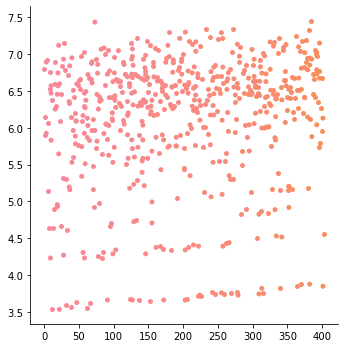

In [59]:
'''sns.catplot(x='Item_MRP',
    y='Item_Outlet_Sales',
    data=data)'''

In [60]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_1', 'Item_Fat_Content_2',
       'Item_Fat_Content_3', 'Item_Fat_Content_4', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
       'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
       'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
       'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15',
       'Item_Outlet_Sales'],
      dtype='object')

In [61]:
data.count

<bound method DataFrame.count of       Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Fat_Content_1  Item_Fat_Content_2  Item_Fat_Content_3  

In [62]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [63]:
X=pd.DataFrame(x)

In [64]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Type_1,Outlet_Type_2,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,9.300,0.016047,249.8092,1999,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,2009,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
y

,Item_Outlet_Sales
0,8.225808
1,6.096776
2,7.648868
3,6.597664
4,6.903451
...,...
8518,7.929984
8519,6.310436
8520,7.085159
8521,7.521100


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=0)

In [67]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred=regressor.predict(X_test)

In [69]:
y_pred

array([[7.68905811],
       [7.41243588],
       [7.46495675],
       ...,
       [8.43379049],
       [4.82014082],
       [8.92855148]])

In [70]:
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.71395588003896


In [71]:
regressor.coef_

array([[-1.10027801e-03, -8.95168414e-02,  8.27467868e-03,
         2.70554927e-03, -2.11427352e-02, -4.56068753e-03,
         4.18731998e-02, -3.03488654e-02,  1.91809250e+00,
         1.74338282e+00,  2.50065148e+00, -1.38521508e-02,
        -2.95537350e-02, -4.26335487e-03, -7.92037421e-02,
         2.37098905e-02, -1.03653394e-01, -6.32972647e-02,
        -2.35852059e-02, -1.81411352e-02,  5.88010926e-03,
        -3.95340980e-02,  3.13651295e-02, -2.95297161e-03,
         9.82608858e-03, -1.44394029e-02, -5.93615891e-02,
        -5.29372228e-02]])

In [72]:
regressor.intercept_

array([-0.91273331])

In [73]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

In [77]:
coefficients

,0,0
0,Item_Weight,-0.001100
1,Item_Visibility,-0.089517
2,Item_MRP,0.008275
3,Outlet_Establishment_Year,0.002706
4,Item_Fat_Content_1,-0.021143
5,Item_Fat_Content_2,-0.004561
6,Item_Fat_Content_3,0.041873
7,Item_Fat_Content_4,-0.030349
8,Outlet_Type_1,1.918093
9,Outlet_Type_2,1.743383


In [74]:
y_pred = regressor.predict(X_test)

In [75]:
y_pred

array([[7.68905811],
       [7.41243588],
       [7.46495675],
       ...,
       [8.43379049],
       [4.82014082],
       [8.92855148]])

In [79]:
x_new = pd.read_csv('test_data.csv')

In [ ]:
datatest=pd.read_csv("test_data.csv")

In [ ]:
datatest.head()

In [ ]:
datatest.columns

In [ ]:
datatest.shape

In [ ]:
datatest.info()